# Ejercicio/Ejemplo

En este Notebook, utilizaremos algunos de los temas vistos para analizar algunos datos de las charlas Ted Talks.

## Idea:
- 1. Explorar
- 2. Transformar/Filtrar
- 3. Visualizar

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px


In [61]:
# Leer archivo a CSV
files="/content/drive/MyDrive/Diplomado data engineer USACH/Modulo 2 pre procesamiento de datos Python/ted_main.csv"
df = pd.read_csv(files)
df

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,17,"Between 2008 and 2016, the United States depor...",476,TED2017,1496707200,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,1505851216,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430
2546,6,How can you study Mars without a spaceship? He...,290,TED2017,1492992000,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,1505919737,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470
2547,10,Science fiction visions of the future show us ...,651,TED2017,1492992000,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,1506006095,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375647
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,1499472000,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,1506024042,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",A black man goes undercover in the alt-right,https://www.t

In [62]:
# exploración del Dataset (al menos 4)

#df.describe()
df.info()
#df.dtypes
#df.head(2)
#df.tail(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

In [63]:
# Pasar las columnas de fecha a un formato legible (está en formato timestamp unix)

df['film_date']

0       1140825600
1       1140825600
2       1140739200
3       1140912000
4       1140566400
           ...    
2545    1496707200
2546    1492992000
2547    1492992000
2548    1499472000
2549    1492992000
Name: film_date, Length: 2550, dtype: int64

In [64]:
df['film_date2'] = pd.to_datetime(df['film_date'], unit = 's')

In [65]:
df['film_date2']

0      2006-02-25
1      2006-02-25
2      2006-02-24
3      2006-02-26
4      2006-02-22
          ...    
2545   2017-06-06
2546   2017-04-24
2547   2017-04-24
2548   2017-07-08
2549   2017-04-24
Name: film_date2, Length: 2550, dtype: datetime64[ns]

In [66]:
df['published_date']

0       1151367060
1       1151367060
2       1151367060
3       1151367060
4       1151440680
           ...    
2545    1505851216
2546    1505919737
2547    1506006095
2548    1506024042
2549    1506092422
Name: published_date, Length: 2550, dtype: int64

In [67]:
df['published_date2'] = df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d'))
df['published_date2']

0       2006-06-27
1       2006-06-27
2       2006-06-27
3       2006-06-27
4       2006-06-27
           ...    
2545    2017-09-19
2546    2017-09-20
2547    2017-09-21
2548    2017-09-21
2549    2017-09-22
Name: published_date2, Length: 2550, dtype: object

In [68]:
def area(**dato):
  codigo
  return resultado

In [69]:
df['published_date3'] = df['published_date2'].astype({'published_date2':'datetime64[ns]'})
df['published_date3']

0      2006-06-27
1      2006-06-27
2      2006-06-27
3      2006-06-27
4      2006-06-27
          ...    
2545   2017-09-19
2546   2017-09-20
2547   2017-09-21
2548   2017-09-21
2549   2017-09-22
Name: published_date3, Length: 2550, dtype: datetime64[ns]

In [70]:
df['published_date3'].min()

Timestamp('2006-06-27 00:00:00')

In [71]:
df['published_year'] = df['published_date3'].dt.year
df['published_year']

0       2006
1       2006
2       2006
3       2006
4       2006
        ... 
2545    2017
2546    2017
2547    2017
2548    2017
2549    2017
Name: published_year, Length: 2550, dtype: int32

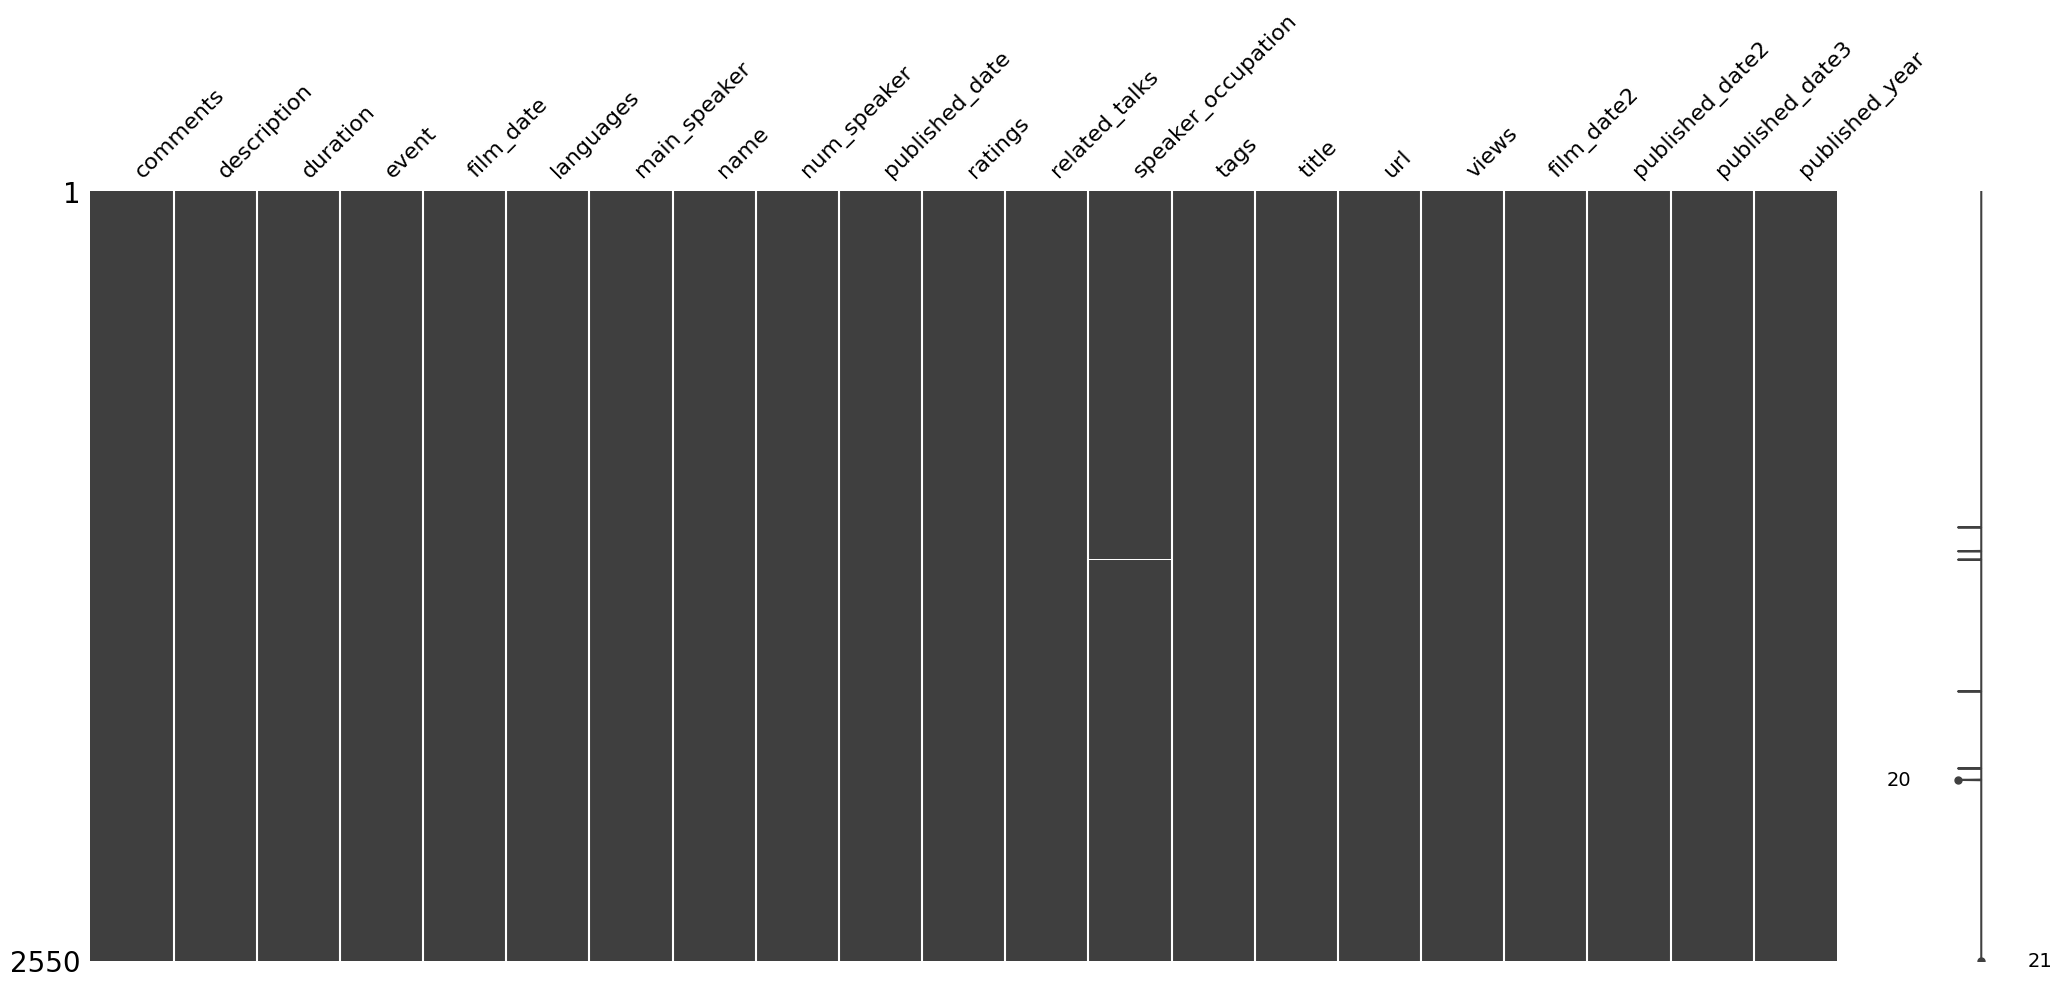

<Figure size 1500x900 with 0 Axes>

In [72]:
import missingno as msno
msno.matrix(df)
plt.figure(figsize= (15,9))
plt.show()


Tenemos más de 2550 Talks a nuestra disposición,  del período comprendido entre 2006 y 2017.

In [73]:
df_y = df.groupby('published_year').count().reset_index()[['published_year', 'title']]
df_y

,published_year,title
0,2006,50
1,2007,122
2,2008,188
3,2009,222
4,2010,257
5,2011,261
6,2012,306
7,2013,244
8,2014,240
9,2015,220


Para empezar. Revisemos cuáles son las 10 charlas TED más vistas de todos los tiempos.

In [74]:
top_10 = df[['title', 'views']].sort_values('views', ascending=False).head(10)
top_10

,title,views
0,Do schools kill creativity?,47227110
1346,Your body language may shape who you are,43155405
677,How great leaders inspire action,34309432
837,The power of vulnerability,31168150
452,10 things you didn't know about orgasm,22270883
1776,How to speak so that people want to listen,21594632
201,My stroke of insight,21190883
5,Why we do what we do,20685401
2114,This is what happens when you reply to spam email,20475972
1416,"Looks aren't everything. Believe me, I'm a model.",19787465


Hagamos un gráfico de barras para visualizar estas 10 talks en términos de la cantidad de visitas que obtuvieron.

speaker con mas apariciones -  más ted talks realizadas


In [75]:
main_speaker = df[['main_speaker', 'views']].sort_values('views', ascending=False).head(10)
main_speaker

,main_speaker,views
0,Ken Robinson,47227110
1346,Amy Cuddy,43155405
677,Simon Sinek,34309432
837,Brené Brown,31168150
452,Mary Roach,22270883
1776,Julian Treasure,21594632
201,Jill Bolte Taylor,21190883
5,Tony Robbins,20685401
2114,James Veitch,20475972
1416,Cameron Russell,19787465


In [76]:
df.loc[0]


comments                                                           4553
description           Sir Ken Robinson makes an entertaining and pro...
duration                                                           1164
event                                                           TED2006
film_date                                                    1140825600
languages                                                            60
main_speaker                                               Ken Robinson
name                          Ken Robinson: Do schools kill creativity?
num_speaker                                                           1
published_date                                               1151367060
ratings               [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
related_talks         [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...
speaker_occupation                                      Author/educator
tags                  ['children', 'creativity', 'culture', 'dan

Ocupación de los speakers más populares

Qué profesión atrae más visitas?


Contar la cantidad de speaker


In [77]:
# agrupar por cantidad de num_speaker

speaker_count = df['num_speaker'].value_counts()
speaker_count

num_speaker
1    2492
2      49
3       5
4       3
5       1
Name: count, dtype: int64

1 talk con 5 speakers... de que se habrá tratado?

In [78]:
ted_5 = df.loc[df['num_speaker']==5]

In [79]:
ted_5


,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,related_talks,speaker_occupation,tags,title,url,views,film_date2,published_date2,published_date3,published_year
2507,6,Movement artists Jon Boogz and Lil Buck debut ...,575,TED2017,1492992000,12,Jon Boogz and Lil Buck,Jon Boogz and Lil Buck: A dance to honor Mothe...,5,1502448962,...,"[{'id': 2589, 'hero': 'https://pe.tedcdn.com/i...",Movement artist,"['art', 'creativity', 'dance', 'performance', ...",A dance to honor Mother Earth,https://www.ted.com/talks/jon_boogz_and_lil_bu...,182975,2017-04-24,2017-08-11,2017-08-11,2017


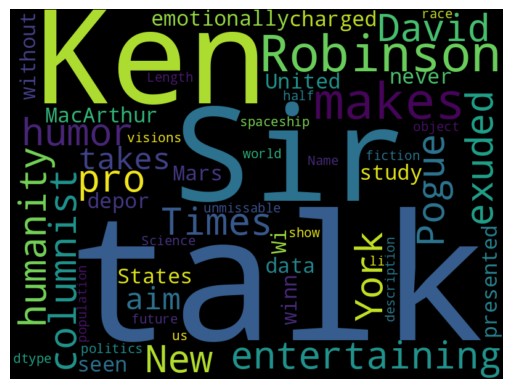

In [80]:
# 6 palabras que mas se repiten en descripciones
palabras = str(df['description'])

wc = WordCloud(width= 800, height= 600 ).generate(palabras)
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")
plt.show()


In [81]:
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,related_talks,speaker_occupation,tags,title,url,views,film_date2,published_date2,published_date3,published_year
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,...,"[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006-02-25,2006-06-27,2006-06-27,2006
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,"[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,2006-02-25,2006-06-27,2006-06-27,2006
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,...,"[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,2006-02-24,2006-06-27,2006-06-27,2006
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,...,"[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,2006-02-26,2006-06-27,2006-06-27,2006
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,...,"[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,2006-02-22,2006-06-27,2006-06-27,2006


#TAREA

## Generar 5 gráficos distintos con su explicación / interpretación

In [82]:
fig = px.bar(df, x='main_speaker', y='duration',title='Tiempo de participación por speaker',labels={'duration':'Duración[Min]','main_speaker':'Presentador principal'})

fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()

En este gráfico podemos ver los distintos presentadores de las charlas TED con los minutos que hablaron en todas las charlas, dando cuenta que el speaker con más participación fue Nicholas Negroponte y el con menos fue Mattew White

In [83]:
df2 = df.drop(['comments',	'description','event','film_date','languages','main_speaker',	'name','num_speaker',	'ratings',	'related_talks','tags','title',	'url',	'views', 'speaker_occupation'], axis = 1)
df2.head()

,duration,published_date,film_date2,published_date2,published_date3,published_year
0,1164,1151367060,2006-02-25,2006-06-27,2006-06-27,2006
1,977,1151367060,2006-02-25,2006-06-27,2006-06-27,2006
2,1286,1151367060,2006-02-24,2006-06-27,2006-06-27,2006
3,1116,1151367060,2006-02-26,2006-06-27,2006-06-27,2006
4,1190,1151440680,2006-02-22,2006-06-27,2006-06-27,2006


In [84]:
df2['published_date'] = pd.to_datetime(df2['published_date']).dt.date

In [88]:
df2.head()
df2.drop(['published_date','film_date2','published_date3','published_year'], axis = 1)

,duration,published_date2
0,1164,2006-06-27
1,977,2006-06-27
2,1286,2006-06-27
3,1116,2006-06-27
4,1190,2006-06-27
...,...,...
2545,476,2017-09-19
2546,290,2017-09-20
2547,651,2017-09-21
2548,1100,2017-09-21


In [92]:
df2['published_date'] = pd.to_datetime(df2['published_date']).dt.date
df2.set_index('published_date2')
df2 = df2.groupby(pd.Grouper(key='published_date2', freq='D'))
df2 = df2['duration'].sum()
df2.head()

published_date2
2006-06-27    7038
2006-06-28       0
2006-06-29       0
2006-06-30       0
2006-07-01       0
Freq: D, Name: duration, dtype: int64

In [99]:
df2 = df2.to_frame().reset_index()


In [127]:
df2 = df2.loc[df2['duration']!= 0].reset_index()
df2 = df2.drop(['level_0','index'], axis = 1)
df2.head()

,published_date2,duration
0,2006-06-27,7038
1,2006-07-10,2190
2,2006-07-18,2747
3,2006-07-25,4502
4,2006-08-01,1584


In [120]:
df2.loc[df2['duration'] == df2['duration'].max()]

,published_date2,duration
282,2007-04-05,21064


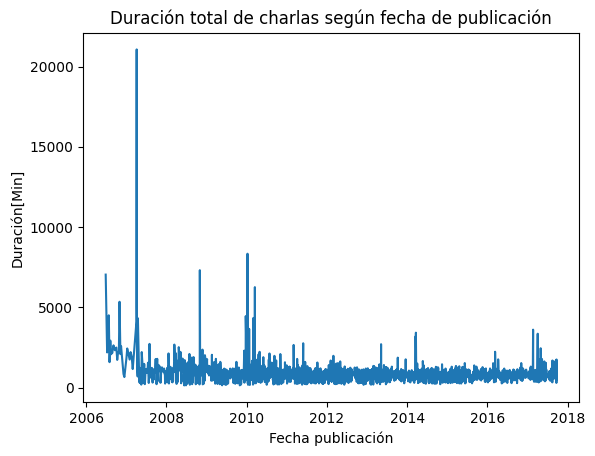

In [113]:
sns.lineplot(df2, x='published_date2', y= 'duration').set_title('Duración total de charlas según fecha de publicación')
plt.xlabel('Fecha publicación')
plt.ylabel('Duración[Min]')
plt.show()

En el gráfico previo podemos dar cuenta que entre el año 2007 se encuentra el máximo de minutos publicados.

In [123]:
fig = px.treemap(df, path = ['main_speaker'], values='views')
fig.show()

En el gráfico anterior podemos ver los speakers con más views, siendo el top 3 Ken Robinson, Amy Cuddy y Simon Sinek

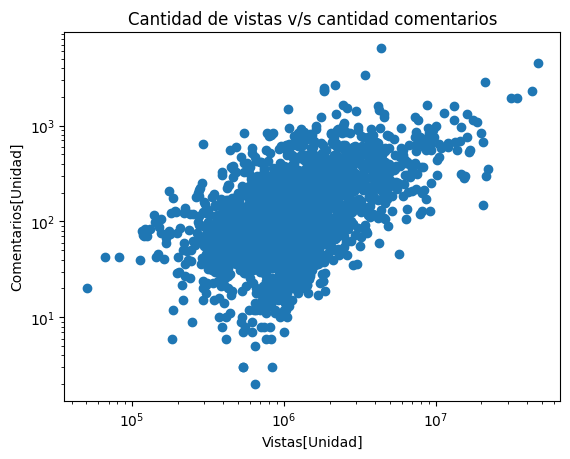

In [148]:
fig = plt.scatter(x= df['views'], y =df['comments'])

plt.xlabel('Vistas[Unidad]')
plt.ylabel('Comentarios[Unidad]')
plt.title('Cantidad de vistas v/s cantidad comentarios')
plt.xscale('log')
plt.yscale('log')
plt.show()

En el gráfico anterior podemos dar cuenta que tanto cantidad de comentarios como cantidad de vistas se relacionan de forma logaritmica y a más vistas la charla posee más comentarios

In [164]:
fig = px.scatter(df, x=df['languages'], y=df['views'],title='Cantidad de idiomas por charla vs cantidad de vistas',template= 'plotly_dark',labels={'languages':'Traducciones[Unidad]','views':'Vistas[Unidad]'})
fig.show()

En el gráfico anterior podemos dar cuenta que las vistas incrementan cuando la charla está traducida entre 30 y 50 idiomas. Además, sobre 50 idiomas no incrementa las vistas.